In [218]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.display import Math
import datetime

# Inference (deepdrivemd) performance

In [273]:
df_ddmd = pd.read_csv('inference.csv',names=['id','step','start_time','elapsed_time'])

In [274]:
df_ddmd

,id,step,start_time,elapsed_time
0,0,Start preprocess_pdb,1.633661e+09,0.000000
1,0,Start preprocess_traj,1.633662e+09,17.597987
2,0,Start concatenate,1.633662e+09,12.332462
3,0,Start write_h5,1.633662e+09,0.000073
4,0,Start generate_embeddings,1.633662e+09,0.001950
...,...,...,...,...
48947,6119,Start write_h5,1.633662e+09,0.000060
48948,6119,Start generate_embeddings,1.633662e+09,0.001772
48949,6119,Start unlink h5,1.633662e+09,2.309940
48950,6119,Start savetxt,1.633662e+09,0.000058


In [167]:
max(df_ddmd['start_time']),min(df_ddmd['start_time'])

(1633662204.077366, 1633661437.0865073)

In [259]:
timing = df_ddmd[df_ddmd['step']=='Start preprocess_traj']

In [275]:
timing = timing.reset_index(drop=True)

In [264]:
df_ddmd.groupby('step')['elapsed_time'].mean()

step
Done                          0.000579
Start concatenate            12.680211
Start generate_embeddings     0.002377
Start preprocess_pdb          0.000000
Start preprocess_traj        21.694879
Start savetxt                 0.000078
Start unlink h5               2.805800
Start write_h5                0.000087
Name: elapsed_time, dtype: float64

## Time to exection in average

In [266]:
print("{:.02f}{}{:.02f} s".format(timing['elapsed_time'].mean(),u"\u00B1", timing['elapsed_time'].std()))

21.69±4.30 s


Text(0.5, 0, 'Replica Id')

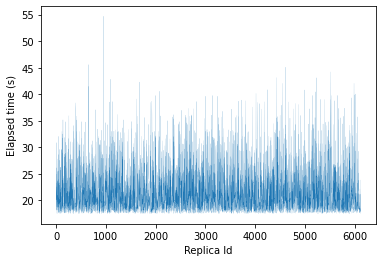

In [278]:
ax=timing['elapsed_time'].plot(linewidth=0.1)
ax.set_ylabel('Elapsed time (s)')
ax.set_xlabel('Replica Id')

Text(0.5, 0, 'Elapsed time (s)')

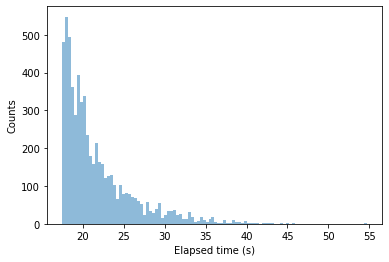

In [282]:
ax = timing['elapsed_time'].plot.hist(bins=102, alpha=0.5)
ax.set_ylabel('Counts')
ax.set_xlabel('Elapsed time (s)')

<AxesSubplot:>

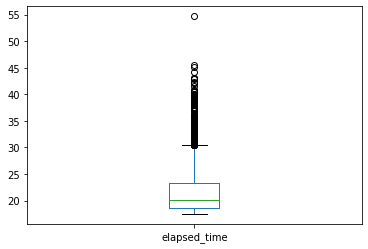

In [105]:
timing['elapsed_time'].plot.box()

# WESTPA performance

In [284]:
df_westpa=pd.read_csv('westpa_stats.csv',names=['id','ns/day','stime','elapsed'])
df_westpa['stime'] = pd.to_datetime(df_westpa['stime'])

In [241]:
df_westpa

,id,ns/day,stime,elapsed
0,001689,33.52,2021-10-08 22:48:22,267.0
1,005916,33.85,2021-10-08 22:49:24,265.0
2,005635,34.03,2021-10-08 22:49:24,263.0
3,000799,33.84,2021-10-08 22:49:24,265.0
4,003647,33.65,2021-10-08 22:48:22,266.0
...,...,...,...,...
5027,001208,34.04,2021-10-08 22:48:54,262.0
5028,004122,33.82,2021-10-08 22:50:26,264.0
5029,001060,33.68,2021-10-08 22:48:57,265.0
5030,000302,33.99,2021-10-08 22:48:16,263.0


# Amber performance

In [285]:
print("{:.02f}{}{:.02f} ns/day".format(df_westpa['ns/day'].mean(),u"\u00B1", df_westpa['ns/day'].std()))

33.85±0.19 ns/day


## Time to execution in average

In [286]:
print("{:.02f}{}{:.02f} s".format(df_westpa['elapsed'].mean(),u"\u00B1", df_westpa['elapsed'].std()))

263.96±1.63 s


## Total time to execution

In [287]:
last_tx = df_westpa[df_westpa['stime']==max(df_westpa['stime'])]['elapsed']
dif = (max(df_westpa['stime'])-min(df_westpa['stime'])).total_seconds()
print("{}s".format(dif + float(last_tx)))

589.0s


<AxesSubplot:>

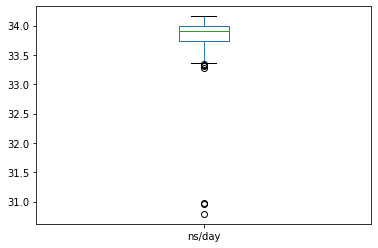

In [288]:
df_westpa['ns/day'].plot.box()

<AxesSubplot:>

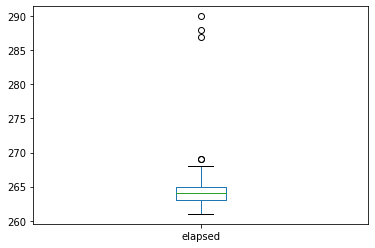

In [289]:
df_westpa['elapsed'].plot.box()